# World Press Index (2019-2021)
### Context
This is an attempt to understand how different nations treat journalists and journalism in general, throughout the world.

### Content
This is a dataset comprising of 180 countries.

***Abuse Score*** : This score is evaluated by experts, based on the violence and abuse caused in a country against journalists and this score is then used a weight metric with the Underlying Situation score to judge the final Global score. The lower the Abuse Score, the better.

***Underlying Situation Score*** : This score is evaluated by a group of experts to depict how truthful and honest information is available to the world by the journalists of the country. Lower the score, the better.

***Global Score*** : This is the final score based on the Underlying Situation Score and the Abuse score. Lower the Global Score of the country, better the rank of a country.

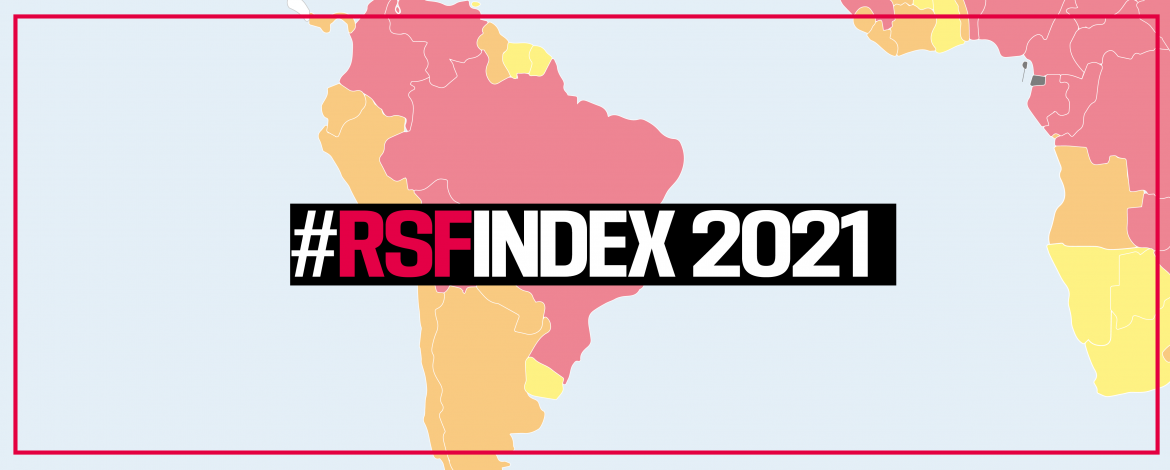

### More information about world press index
**WHAT IS IT?**

Published every year since 2002 by Reporters Without Borders (RSF), the World Press Freedom Index is an important advocacy tool based on the principle of emulation between states. Because it is well known, its influence over governments is growing. Many heads of state and government fear its annual publication. The Index is a point of reference that is quoted by media throughout the world and is used by diplomats and international entities such as the United Nations and the World Bank.

**WHAT DOES IT MEASURE?**

The Index ranks 180 countries and regions according to the level of freedom available to journalists. It is a snapshot of the media freedom situation based on an evaluation of pluralism, independence of the media, quality of legislative framework and safety of journalists in each country and region. It does not rank public policies even if governments obviously have a major impact on their country’s ranking. Nor is it an indicator of the quality of journalism in each country or region.

**THE GLOBAL INDICATOR AND REGIONAL INDICATORS**

Along with the Index, RSF calculates a global indicator and regional indicators that evaluate the overall performance of countries and regions (in the world and in each region) as regards media freedom. It is an absolute measure that complements the Index’s comparative rankings. The global indicator is the average of the regional indicators, each of which is obtained by averaging the scores of all the countries in the region, weighted according to their population as given by the World Bank.

**HOW THE INDEX IS COMPILED**

The degree of freedom available to journalists in 180 countries and regions is determined by pooling the responses of experts to a questionnaire devised by RSF. This qualitative analysis is combined with quantitative data on abuses and acts of violence against journalists during the period evaluated. The criteria used in the questionnaire are pluralism, media independence, media environment and self-censorship, legislative framework, transparency, and the quality of the infrastructure that supports the production of news and information.

Source: <a>https://rsf.org/</a>

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import pycountry
import warnings
from ipywidgets import interact
import pycountry_convert as pc
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df = pd.read_csv('../input/World Press Index 2021.csv')
df.head()

,Country Name,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2021,Global Score 2020,Global Score 2019
0,Norway,0.00,6.72,6.72,7.84,7.82
1,Finland,0.00,6.99,6.99,7.93,7.90
2,Sweden,0.00,7.24,7.24,9.25,8.31
3,Denmark,0.00,8.57,8.57,8.13,9.87
4,Costa Rica,10.99,8.21,8.76,10.53,12.24


In [3]:
# 180 rows, 6 columns
df.shape

(180, 6)

In [4]:
# There is not NaN or null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country Name                     180 non-null    object 
 1   Abuse Score 2021                 180 non-null    float64
 2   Underlying Situation Score 2021  180 non-null    float64
 3   Global Score 2021                180 non-null    float64
 4   Global Score 2020                180 non-null    float64
 5   Global Score 2019                180 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.6+ KB


In [5]:
df.describe()

,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2021,Global Score 2020,Global Score 2019
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,20.800500,34.603944,35.081722,34.799722,35.017889
std,22.641547,15.744684,15.831011,15.684339,15.784655
min,0.000000,6.720000,6.720000,7.840000,7.820000
25%,0.000000,24.435000,24.437500,23.910000,25.590000
50%,13.860000,31.575000,31.690000,31.050000,31.195000
75%,35.550000,43.387500,43.820000,43.450000,44.010000
max,82.590000,82.050000,81.450000,85.820000,85.440000


# Views of the best and worst 20 scores between 2019 and 2021
In this studio only we'll focus in the Global Score

In [6]:
data = df[['Country Name','Global Score 2021', 'Global Score 2020', 'Global Score 2019']]

In [7]:
def best_GS(Year):
    fig = px.bar(data.iloc[:20], y=Year, x='Country Name', text=Year, color='Country Name',
                 color_discrete_sequence=px.colors.qualitative.Set2, title='Best ' + str(Year))
    fig.update_traces(texttemplate='%{text:}', textposition='outside')
    fig.update_layout(showlegend=False)
    fig.show()

In [8]:
# we create an interactive visualization of the best scores per year
interact(best_GS, Year=['Global Score 2021', 'Global Score 2020', 'Global Score 2019'])

interactive(children=(Dropdown(description='Year', options=('Global Score 2021', 'Global Score 2020', 'Global …

<function __main__.best_GS(Year)>

In [9]:
def worst_GB(Year):
    fig = px.bar(data.iloc[-20:-1], y=Year, x='Country Name', text=Year, color='Country Name',
                 color_discrete_sequence=px.colors.qualitative.Set2, title='Worst '+ Year)
    fig.update_traces(texttemplate='%{text:}', textposition='outside')
    fig.update_layout(showlegend=False)
    fig.show()

In [10]:
# we repeat the same for the lowest score per year
interact(worst_GB, Year=['Global Score 2021', 'Global Score 2020', 'Global Score 2019'])

interactive(children=(Dropdown(description='Year', options=('Global Score 2021', 'Global Score 2020', 'Global …

<function __main__.worst_GB(Year)>

# Variables alpha2 and alpha3
We convert country names to alpha2 and alpha3 variables using the pycountry_convert and pycountry library

In [11]:
data.head()

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019
0,Norway,6.72,7.84,7.82
1,Finland,6.99,7.93,7.90
2,Sweden,7.24,9.25,8.31
3,Denmark,8.57,8.13,9.87
4,Costa Rica,8.76,10.53,12.24


In [12]:
def name_toalpha3(names_countries):
    try:
        return pc.country_name_to_country_alpha3(names_countries,cn_name_format = "default")
    except:
        return ("not founded")
    
data['Code A3'] = data.apply(lambda x: name_toalpha3(x['Country Name']),axis=1)

In [13]:
data.head()

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019,Code A3
0,Norway,6.72,7.84,7.82,NOR
1,Finland,6.99,7.93,7.90,FIN
2,Sweden,7.24,9.25,8.31,SWE
3,Denmark,8.57,8.13,9.87,DNK
4,Costa Rica,8.76,10.53,12.24,CRI


In [14]:
data[data['Code A3'] == 'not founded']

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019,Code A3
44,OECS,23.98,23.78,26.04,not founded
57,Bosnia-Herzegovina,28.34,28.51,29.02,not founded
65,Côte d’Ivoire,28.87,28.94,29.52,not founded
77,Kosovo,30.32,29.33,29.68,not founded
86,Haïti,31.12,30.20,29.00,not founded
94,Guinea Bissau,32.68,32.06,30.95,not founded
117,Congo-Brazzaville,38.83,36.56,36.04,not founded
135,Morocco / Western Sahara,43.94,42.88,43.98,not founded
148,Democratic Republic of Congo,48.59,49.09,51.71,not founded


These countries were not found, so as there is little data we will proceed to look for their codes manually and fill them in the dataframe

In [15]:
# Search example
list(pycountry.countries)[:10]

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')]

In [16]:
countries_A3 = [57, 65, 86, 94, 117,  135, 148]
cod_A3 = ['BIH', 'CIV', 'HTI', 'GNB', 'COG', 'MAR', 'COD']

In [17]:
for i in range(len(cod_A3)):
    data.loc[countries_A3[i],'Code A3'] = cod_A3[i]

In [18]:
# We observe that the values were replaced
data.loc[countries_A3,'Code A3']

57     BIH
65     CIV
86     HTI
94     GNB
117    COG
135    MAR
148    COD
Name: Code A3, dtype: object

In [19]:
# These two countries were the only ones in which the alpha3 code was not found.
data[data['Code A3'] == 'not founded']

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019,Code A3
44,OECS,23.98,23.78,26.04,not founded
77,Kosovo,30.32,29.33,29.68,not founded


Now we will repeat the same procedure to obtain the alpha2 codes

In [20]:
def name_toalpha2(names_countries):
    try:
        return pc.country_name_to_country_alpha2(names_countries,cn_name_format = "default")
    except:
        return ("not founded")
    
data['Code A2'] = data.apply(lambda x: name_toalpha2(x['Country Name']),axis=1)

In [21]:
countries_A2 = [57, 65, 86, 94, 117,  135, 148]
cod_A2 = ['BA', 'CI', 'HT', 'GW', 'CG', 'MA', 'CD']

In [22]:
for i in range(len(cod_A2)):
    data.loc[countries_A2[i],'Code A2'] = cod_A2[i]

In [23]:
data.head()

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019,Code A3,Code A2
0,Norway,6.72,7.84,7.82,NOR,NO
1,Finland,6.99,7.93,7.90,FIN,FI
2,Sweden,7.24,9.25,8.31,SWE,SE
3,Denmark,8.57,8.13,9.87,DNK,DK
4,Costa Rica,8.76,10.53,12.24,CRI,CR


# Interactive visualization of the distribution of global scores worldwide 

In [24]:
def world(Year):
    fig = px.choropleth(data, locations="Code A3",
                    color=Year, 
                    hover_name="Country Name",
                    title=Year)
    fig.show()

In [25]:
interact(world, Year=['Global Score 2021', 'Global Score 2020', 'Global Score 2019'])

interactive(children=(Dropdown(description='Year', options=('Global Score 2021', 'Global Score 2020', 'Global …

<function __main__.world(Year)>

# Interactive visualization of the distribution of global scores by continent

In [26]:
def year(Year,continents):
    fig = px.choropleth(data, locations="Code A3",
                        color=Year, 
                        hover_name="Country Name",
                        scope=continents,
                       title=continents.capitalize())
    fig.show()

In [27]:
interact(year, Year=['Global Score 2021', 'Global Score 2020', 'Global Score 2019'], continents=['europe','asia','south america','north america','africa'])

interactive(children=(Dropdown(description='Year', options=('Global Score 2021', 'Global Score 2020', 'Global …

<function __main__.year(Year, continents)>

Now we will create a function that converts the alpha2 code of the country to the continent in which it belongs to then graph the behavior of the average of the global scores by continent over the last 3 years

In [28]:
def alpha2_tocontinent(country_alpha2):
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return ("not founded")
    
data['Continent'] = data.apply(lambda x: alpha2_tocontinent(x['Code A2']),axis=1)

In [29]:
data.head(10)

,Country Name,Global Score 2021,Global Score 2020,Global Score 2019,Code A3,Code A2,Continent
0,Norway,6.72,7.84,7.82,NOR,NO,Europe
1,Finland,6.99,7.93,7.90,FIN,FI,Europe
2,Sweden,7.24,9.25,8.31,SWE,SE,Europe
3,Denmark,8.57,8.13,9.87,DNK,DK,Europe
4,Costa Rica,8.76,10.53,12.24,CRI,CR,North America
5,Netherlands,9.67,9.96,8.63,NLD,NL,Europe
6,Jamaica,9.96,10.51,11.13,JAM,JM,North America
7,New Zealand,10.04,10.69,10.75,NZL,NZ,Oceania
8,Portugal,10.11,11.83,12.63,PRT,PT,Europe
9,Switzerland,10.55,10.62,10.52,CHE,CH,Europe


In [30]:
avg_continents = data.groupby('Continent').mean()
avg_continents = avg_continents.transpose()
avg_continents = avg_continents.reset_index().rename(columns={'index': 'Year'})

In [31]:
avg_continents['Year'].replace('Global Score 2021', 2021, inplace=True)
avg_continents['Year'].replace('Global Score 2020', 2020, inplace=True)
avg_continents['Year'].replace('Global Score 2019', 2019, inplace=True)

In [32]:
avg_continents = avg_continents.sort_values(by='Year')
avg_continents

Continent,Year,Africa,Asia,Europe,North America,Oceania,South America,not founded
2,2019,38.160189,45.9660,22.981951,30.938000,20.473333,30.634167,28.550000
1,2020,37.880755,45.7404,22.700244,30.499333,21.293333,30.856667,27.670000
0,2021,38.101887,46.2326,22.786098,30.842667,21.076667,31.411667,27.803333


# Distribution of average global score in each continent by year

In [33]:
# Visualization

fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['Africa'],
                    mode='lines+markers',
                    name='Africa'))

fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['Asia'],
                    mode='lines+markers',
                    name='Asia'))

fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['Europe'],
                    mode='lines+markers',
                    name='Europe'))

fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['North America'],
                    mode='lines+markers',
                    name='North America'))
                                                                      
fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['South America'],
                    mode='lines+markers',
                    name='South America'))
                                                                      
fig.add_trace(go.Scatter(x=avg_continents['Year'], y=avg_continents['Oceania'],
                    mode='lines+markers',
                    name='Oceania'))

fig.update_layout(
    xaxis = dict(
        tick0 = 2018,
        dtick = 1
    ),
    title = 'Distribution of average global score in each continent by year'
)

fig.show()

# Conclusion
The countries with the most favorable press freedom index are on the continent of Oceania and Europe is very close to it. Then the countries of America follow with an average of about 30 points. Finally, the countries with the most unfavorable press index are found in the continents of Africa and Asia, the latter being the most complicated.